In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2022-01-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2022_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-01-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,8175,남구,750,10.1%,"7,800"
1,2022-01-20,간장,오복왕표 0.9ℓ 1병,6141,남구,6300,남구,159,2.59%,"6,221"
2,2022-01-20,갈치,60cm정도 500g 1마리(냉동),9069,남구,14200,남구,5131,56.58%,"11,635"
3,2022-01-20,고등어,30㎝정도 500g 1마리,5465,남구,5478,남구,13,0.24%,"5,472"
4,2022-01-20,달걀,오경슈퍼란60g정도 10개,3980,남구,4000,남구,20,0.5%,"3,990"
5,2022-01-20,닭고기,육계 1.0㎏,6990,남구,9975,남구,2985,42.7%,"8,483"
6,2022-01-20,대파,1.0㎏,2920,남구,3691,남구,771,26.4%,"3,306"
7,2022-01-20,돼지고기,삼겹살 500g,9950,남구,15900,남구,5950,59.8%,"12,925"
8,2022-01-20,두부,500g 판두부(국산포장두부 420g) 1모,4531,남구,5194,남구,663,14.63%,"4,863"
9,2022-01-20,라면,신라면 120g 1봉지,736,남구,736,남구,0,0.0%,736


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2022-04-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2022_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-04-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,남구,8925,남구,0,0.0%,"8,925"
1,2022-04-21,간장,오복왕표 0.9ℓ 1병,6829,남구,6829,남구,0,0.0%,"6,829"
2,2022-04-21,갈치,60cm정도 500g 1마리(냉동),7500,남구,11847,남구,4347,57.96%,"9,674"
3,2022-04-21,고등어,30㎝정도 500g 1마리,4990,남구,6650,남구,1660,33.27%,"5,820"
4,2022-04-21,달걀,오경슈퍼란60g정도 10개,3690,남구,3980,남구,290,7.86%,"3,835"
5,2022-04-21,닭고기,육계 1.0㎏,8990,남구,10850,남구,1860,20.69%,"9,920"
6,2022-04-21,대파,1.0㎏,2920,남구,3517,남구,597,20.45%,"3,219"
7,2022-04-21,돼지고기,삼겹살 500g,14900,남구,17900,남구,3000,20.13%,"16,400"
8,2022-04-21,두부,500g 판두부(국산포장두부 420g) 1모,4531,남구,5194,남구,663,14.63%,"4,863"
9,2022-04-21,라면,신라면 120g 1봉지,736,남구,736,남구,0,0.0%,736


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2022-07-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2022_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-07-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,8175,남구,750,10.1%,"7,800"
1,2022-07-21,간장,오복왕표 0.9ℓ 1병,6146,남구,6829,남구,683,11.11%,"6,488"
2,2022-07-21,갈치,60cm정도 500g 1마리(냉동),5977,남구,13043,남구,7066,118.22%,"9,510"
3,2022-07-21,고등어,30㎝정도 500g 1마리,6081,남구,6633,남구,552,9.08%,"6,357"
4,2022-07-21,달걀,오경슈퍼란60g정도 10개,3690,남구,3980,남구,290,7.86%,"3,835"
5,2022-07-21,닭고기,육계 1.0㎏,7480,남구,8990,남구,1510,20.19%,"8,235"
6,2022-07-21,대파,1.0㎏,2450,남구,4737,남구,2287,93.35%,"3,594"
7,2022-07-21,돼지고기,삼겹살 500g,12950,남구,18900,남구,5950,45.95%,"15,925"
8,2022-07-21,두부,500g 판두부(국산포장두부 420g) 1모,4398,남구,4531,남구,133,3.02%,"4,465"
9,2022-07-21,라면,신라면 120g 1봉지,736,남구,736,남구,0,0.0%,736


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2022-10-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2022_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-10-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,남구,9675,남구,750,8.4%,"9,300"
1,2022-10-20,간장,오복왕표 0.9ℓ 1병,6146,남구,6146,남구,0,0.0%,"6,146"
2,2022-10-20,갈치,60cm정도 500g 1마리(냉동),7300,남구,16500,남구,9200,126.03%,"11,900"
3,2022-10-20,고등어,30㎝정도 500g 1마리,4985,남구,6081,남구,1096,21.99%,"5,533"
4,2022-10-20,달걀,오경슈퍼란60g정도 10개,3690,남구,3980,남구,290,7.86%,"3,835"
5,2022-10-20,닭고기,육계 1.0㎏,7984,남구,8490,남구,506,6.34%,"8,237"
6,2022-10-20,대파,1.0㎏,2680,남구,4862,남구,2182,81.42%,"3,771"
7,2022-10-20,돼지고기,삼겹살 500g,14000,남구,18400,남구,4400,31.43%,"16,200"
8,2022-10-20,두부,500g 판두부(국산포장두부 420g) 1모,4487,남구,4962,남구,475,10.59%,"4,725"
9,2022-10-20,라면,신라면 120g 1봉지,736,남구,820,남구,84,11.41%,778


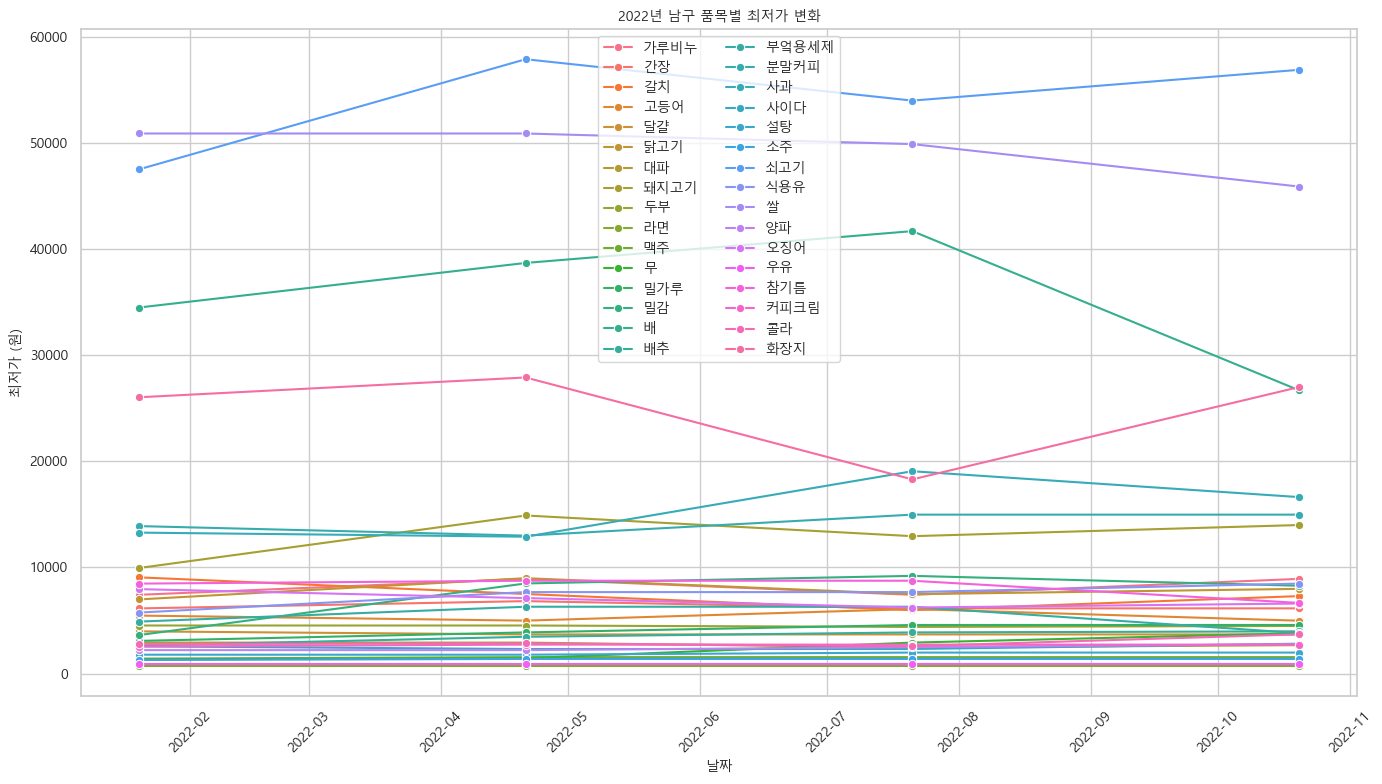

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2022_1q.csv")
q2 = pd.read_csv("남구2022_2q.csv")
q3 = pd.read_csv("남구2022_3q.csv")
q4 = pd.read_csv("남구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 남구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("남구2022_min.csv", index=False, encoding="utf-8-sig")

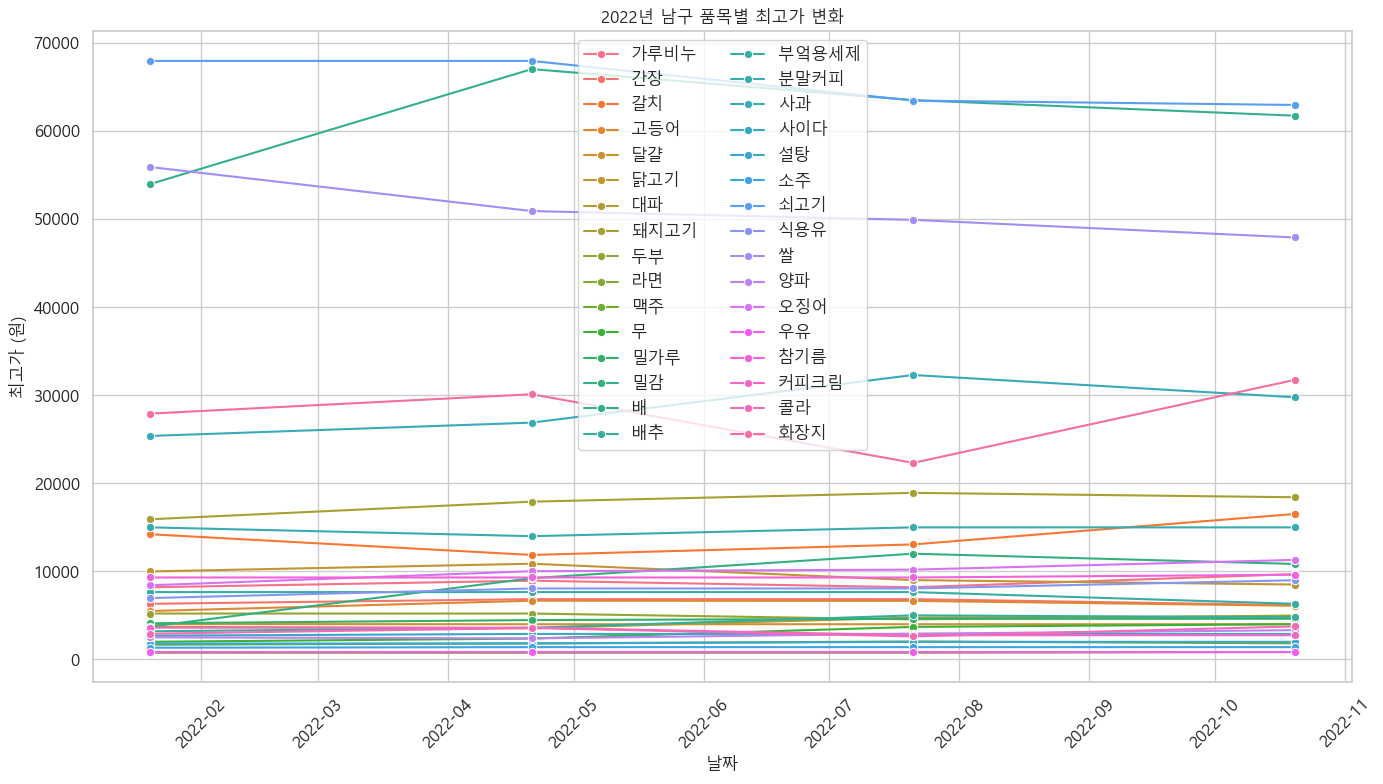

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2022_1q.csv")
q2 = pd.read_csv("남구2022_2q.csv")
q3 = pd.read_csv("남구2022_3q.csv")
q4 = pd.read_csv("남구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 남구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("남구2022_max.csv", index=False, encoding="utf-8-sig")